<a href="https://colab.research.google.com/github/saipavan3009/ADM_2303A51117/blob/main/ADM_LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
np.random.seed(42)
data=np.random.normal(0,1,100)
outliers=np.random.uniform(5,10,5)
data_with_outliers=np.concatenate([data,outliers])

In [ ]:
data=pd.DataFrame(data_with_outliers,columns=['values'])

In [ ]:
q1=data['values'].quantile(0.25)
q3=data['values'].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

In [ ]:
outliers_iqr=data[(data['values']<lower_bound) | (data['values']>upper_bound)]

In [ ]:
z_scores=stats.zscore(data['values'])
outliers_zscore=data[np.abs(z_scores)>3]

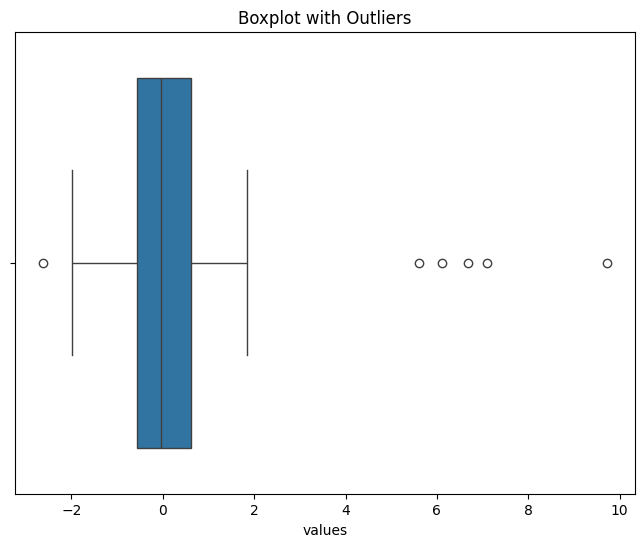

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['values'])
plt.title('Boxplot with Outliers')
plt.show()

In [ ]:
data_capped=data.copy()
data_capped['values']=np.clip(data_capped['values'], lower_bound, upper_bound)

In [ ]:
data_removed=data.copy()
data_removed=data_removed[(data_removed['values']>=lower_bound) & (data_removed['values']<=upper_bound)]

In [ ]:
data_imputed=data.copy()
medium_value = data['values'].median()
data_imputed['values'] = np.where((data_imputed['values']<lower_bound) | (data_imputed['values']>upper_bound), medium_value, data_imputed['values'])

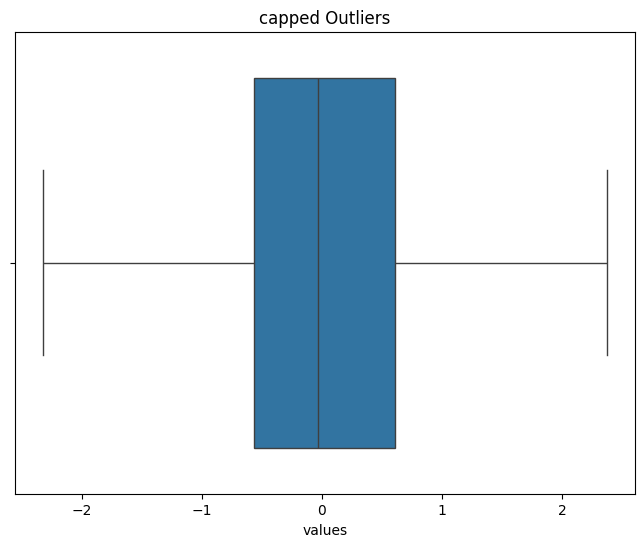

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data_capped['values'])
plt.title('capped Outliers')
plt.show()

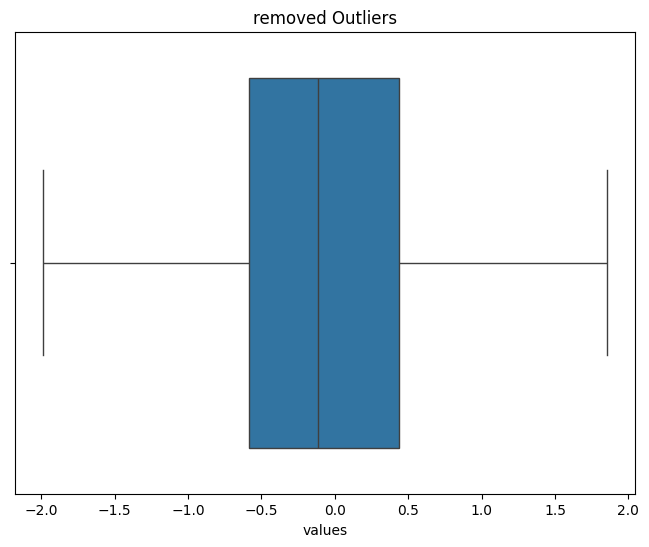

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data_removed['values'])
plt.title('removed Outliers')
plt.show()

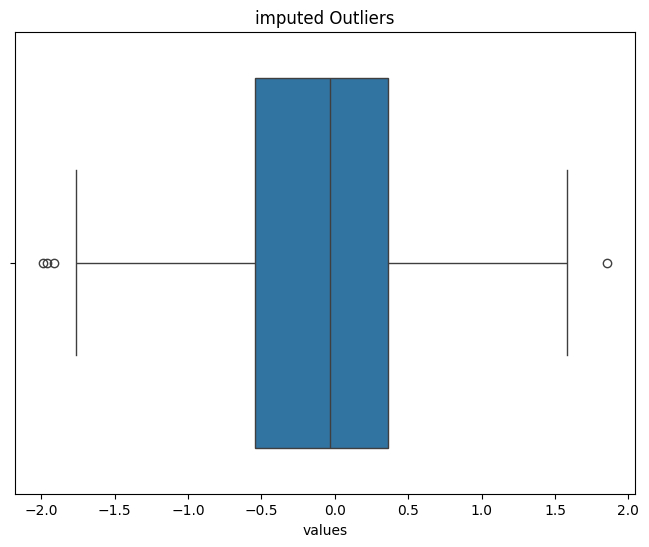

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data_imputed['values'])
plt.title('imputed Outliers')
plt.show()

In [ ]:
print(f"outliers detected using IQR: \n{outliers_iqr}")
print(f"outliers detected using z-score: \n{outliers_zscore}")

outliers detected using IQR: 
       values
74  -2.619745
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
outliers detected using z-score: 
       values
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
